# Thyroid Disease Detection

##### Life cycle of Thyroid disease Detector
- Understanding the problem statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis
- Data preprocessing
- Model Training
- Choose best model

## 1) Problem Statement

- Thyroid disease is a common cause of medical diagnosis and prediction, with an onset that is difficult to forecast in medical research. The thyroid gland is one of our body's most vital organs. Thyroid hormone releases are responsible for metabolic regulation. Hyperthyroidism and hypothyroidism are one of the two common diseases of the thyroid that releases thyroid hormones in regulating the rate of body's metabolism.The main goal is to predict the estimated risk on a patient's chance of obtaining thyroid disease or not.


## 2) Data Collection
- Dataset Source - https://archive.ics.uci.edu/dataset/102/thyroid+disease
- From Garavan Institute
- Documentation: as given by Ross Quinlan
- 6 databases from the Garavan Institute in Sydney, Australia
- Approximately the following for each database:

    ** 2800 training (data) instances and 972 test instances
    ** Plenty of missing data
    ** 29 or so attributes, either Boolean or continuously-valued 

- 2 additional databases, also from Ross Quinlan, are also here

    ** Hypothyroid.data and sick-euthyroid.data
    ** Quinlan believes that these databases have been corrupted
    ** Their format is highly similar to the other databases 

- A Thyroid database suited for training ANNs

    ** 3 classes
    ** 3772 training instances, 3428 testing instances
    ** Includes cost data (donated by Peter Turney) 

### 2.1 Import Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn, regular expression and Os Libraries

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
import re

### Setting DataFrame max Rows and Columns view
- Maximum columns: 5000
- Maximum rows: All

In [114]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',10000)

## 3) Combining Multiple datasets
- Datasets are divided into 2 formats:
    - Format-1: contains 30 attributes
    - Format-2: contains 26 attributes

### 3.1 Defining paths for Format-1 and Format-2 file folders

In [115]:
file_path_1='raw_thyroid_dataset/format_1_data'

In [116]:
file_path_2='raw_thyroid_dataset/format_2_data'

- Below function will be used for fetching the training file names

In [117]:
def fetch_file_names(dir_path):
    files=os.listdir(dir_path)
    data_file_names=[file for file in files if file.endswith('.data')]
    return data_file_names

- Below function will be used for combining all the individual datasets

In [118]:
def merge_dataset(dir_path, data_file_names_list):
    df=pd.read_csv(f"{dir_path}/{data_file_names_list[0]}",header=None)
    for file in data_file_names_list[1:]:
        temp_df=pd.read_csv(os.path.join(dir_path,file),header=None,)
        df=pd.concat([df,temp_df],axis=0, ignore_index=True)
    return df

### 3.2 Combining the all Format-1 datasets in a single file

In [119]:
file_names=fetch_file_names(file_path_1)
df=merge_dataset(file_path_1,file_names)

In [120]:
df

0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16     17 18    19 20  \
0      41  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    1.3  t   2.5  t   
1      23  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    4.1  t     2  t   
2      46  M  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t   0.98  f     ?  t   
3      70  F  t  f  f  f  f  f  f  f  f  f  f  f  f  f  t   0.16  t   1.9  t   
4      70  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t   0.72  t   1.2  t   
5      18  F  t  f  f  f  f  f  f  f  f  f  f  f  f  f  t   0.03  f     ?  t   
6      59  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  f      ?  f     ?  t   
7      80  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    2.2  t   0.6  t   
8      66  F  f  f  f  f  f  f  f  f  f  f  f  t  f  f  t    0.6  t   2.2  t   
9      68  M  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    2.4  t   1.6  t   
10     84  F  f  f  f  f  f  f  f  f  f  f  f  t  f  f  t    1.1  t   2.2  t   
11     67  F  t  f  f  f  f  f  f  f  f  f  f  f  f  f  t   0.03  f     ?  t   
12     71  F  f  f  f  t  f  f  f  f  t  f  f  f  f  f  t   0.03  t   3.8  t   
13     59  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    2.8  t   1.7  t   
14     28  M  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    3.3  t   1.8  t   
15     65  F  f  f  f  f  f  f  f  t  f  f  f  f  f  f  t     12  f     ?  t   
16     42  ?  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    1.2  t   1.8  t   
17     63  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    1.5  t   1.2  t   
18     80  F  f  f  f  f  f  f  f  f  f  f  f  f  f  t  t      6  t   1.6  t   
19     28  M  f  f  f  f  f  f  f  f  f  f  f  f  f  t  t    2.1  t   2.6  t   
20     51  F  t  f  f  f  f  f  f  f  f  f  f  f  f  f  t    0.1  f     ?  t   
21     46  M  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    0.8  t   2.1  t   
22     81  M  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    1.9  t   0.3  t   
23     54  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    3.1  f     ?  t   
24     55  M  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    0.2  t   1.8  t   
25     63  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t   0.03  t   5.5  t   
26     60  M  t  f  f  f  f  f  f  f  f  f  f  f  f  f  t     13  t   1.4  t   
27     25  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    0.3  t   3.1  t   
28     73  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    1.9  t   1.5  t   
29     67  M  f  f  f  f  f  f  f  f  f  f  f  f  f  f  f      ?  f     ?  t   
30     34  F  f  f  f  f  t  f  f  f  t  f  f  f  f  f  t  0.035  t   2.5  t   
31     70  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    2.5  t   2.3  t   
32     78  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    0.5  t   1.9  t   
33     37  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    1.7  t   1.9  t   
34     85  F  f  f  f  f  f  f  f  t  f  f  f  f  f  f  t    7.3  t   2.4  t   
35     25  F  f  f  f  f  f  f  f  f  f  f  f  t  f  f  t    1.1  f     ?  t   
36     26  F  f  f  f  f  f  f  f  f  f  f  f  f  f  t  t    1.8  t   2.5  t   
37     58  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t   0.26  t   2.7  t   
38     51  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    2.8  f     ?  t   
39     64  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  f      ?  f     ?  f   
40     44  M  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t     45  t   1.4  t   
41     48  M  f  t  f  f  f  f  f  f  t  f  f  f  f  f  t    5.4  t   1.9  t   
42     61  F  f  f  f  f  f  f  f  f  f  f  t  f  f  f  t   0.99  t   1.5  t   
43     35  F  t  f  f  f  f  f  f  f  f  f  f  f  f  f  t   0.25  t     2  t   
44     70  F  f  f  f  t  f  f  f  f  f  f  f  f  f  f  t    1.1  t   1.7  t   
45     81  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t    0.2  t   2.2  t   
46     83  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t   0.92  t   0.9  t   
47     21  ?  f  f  f  f  f  f  f  f  f  f  f  f  f  f  f      ?  t   1.8  t   
48     87  F  f  f  f  f  f  f  f  f  f  f  f  f  f  f  t   0.15  t   1.7  t   
49     

- Format-1 data has 25972 instances and 30 attributes

#### 3.2.1 Fetching Feature names of dataset

- Below function will fetch the features names from the given source path

In [121]:
def fetch_feature_names(src_path):
    with open(src_path) as file:
        itr_line=file.readlines()
        features_begining_point=itr_line.index('age:\t\t\t\tcontinuous.\n')
        itr_line=itr_line[features_begining_point:len(itr_line)]

        features_list=[]
        for features in itr_line:
            sep_point=features.find(":")
            features_list.append(features[:sep_point])
    return features_list

In [122]:
feature_list=fetch_feature_names(f"{file_path_1}/allhyper.names")

#### df dataset has 30 columns where we have only 29 feature names in features name list
- Appending the disease feature to list for 30th column

In [123]:
feature_list.append('disease')

- Assigning features names to the header of dataset

In [124]:
df.columns=feature_list

In [125]:
df.head(200)

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0    41   F            f                  f                         f    f   
1    23   F            f                  f                         f    f   
2    46   M            f                  f                         f    f   
3    70   F            t                  f                         f    f   
4    70   F            f                  f                         f    f   
5    18   F            t                  f                         f    f   
6    59   F            f                  f                         f    f   
7    80   F            f                  f                         f    f   
8    66   F            f                  f                         f    f   
9    68   M            f                  f                         f    f   
10   84   F            f                  f                         f    f   
11   67   F            t                  f                         f    f   
12   71   F            f                  f                         f    t   
13   59   F            f                  f                         f    f   
14   28   M            f                  f                         f    f   
15   65   F            f                  f                         f    f   
16   42   ?            f                  f                         f    f   
17   63   F            f                  f                         f    f   
18   80   F            f                  f                         f    f   
19   28   M            f                  f                         f    f   
20   51   F            t                  f                         f    f   
21   46   M            f                  f                         f    f   
22   81   M            f                  f                         f    f   
23   54   F            f                  f                         f    f   
24   55   M            f                  f                         f    f   
25   63   F            f                  f                         f    f   
26   60   M            t                  f                         f    f   
27   25   F            f                  f                         f    f   
28   73   F            f                  f                         f    f   
29   67   M            f                  f                         f    f   
30   34   F            f                  f                         f    f   
31   70   F            f                  f                         f    f   
32   78   F            f                  f                         f    f   
33   37   F            f                  f                         f    f   
34   85   F            f                  f                         f    f   
35   25   F            f                  f                         f    f   
36   26   F            f                  f                         f    f   
37   58   F            f                  f                         f    f   
38   51   F            f                  f                         f    f   
39   64   F            f                  f                         f    f   
40   44   M            f                  f                         f    f   
41   48   M            f                  t                         f    f   
42   61   F            f                  f                         f    f   
43   35   F            t                  f                         f    f   
44   70   F            f                  f                         f    t   
45   81   F            f                  f                         f    f   
46   83   F            f                  f                         f    f   
47   21   ?            f                  f                         f    f   
48   87   F            f                  f                         f    f   
49   78   F            f                  f                         f    f   
50   64   F            f  

### 3.3 Combining all Format-2 datasets in a single file

In [126]:
file_names=fetch_file_names(file_path_2)
# df2=merge_dataset(file_path_2,file_names)

In [127]:
# print(df2.columns)
# df2.shape

- Format-2 data has 6326 instances and 26 attributes

#### 3.3.1 Fetching feature names of dataset

In [128]:
# Defining function to fetch features from format-2 dataset folder

def fetch_feature_names2(src_path):
    with open(src_path) as file:
        itr_line=file.readlines()
        features_begining_point=[idx for idx,val in enumerate(itr_line) if re.search(r'age*',val)]
        itr_line=itr_line[features_begining_point[0]:len(itr_line)]

        features_list=[]
        for features in itr_line:
            sep_point=features.find(":")
            features_list.append(features[:sep_point])
    return features_list

In [129]:
# feature_list2=fetch_feature_names2(f"{file_path_2}/hypothyroid.names")

In [130]:
# feature_list2

### 3.4 Format-2 data must be converted to the format of Format-1 data for merging initiation

In [131]:
# adjusting disease columns position from begining to the end

# outputs=df2.pop(0)
# df2.columns=feature_list2
# df2['disease']=outputs

In [132]:
# df2.head()

### 3.5 Merging Format-1 and Format-2 data

#### 3.5.1 Checking columns of Format-1 and Format-2 dataset

In [133]:
print(f"Format-1 Data columns:\n{df.columns}")
# print(f"Format-2 Data columns:\n{df2.columns}")

Format-1 Data columns:
Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'disease'],
      dtype='object')


- Features of Format-1 dataset is using whitespaces to separate words
- Features of Format-2 dataset is using underscore to separate words

    - All features must be converted to the same word separation format

#### 3.5.1 Replacing whitespace with underscore in feature names of Format-1 dataset

In [134]:
df.columns=[features.replace(" ","_") for features in df.columns]
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'disease'],
      dtype='object')

#### 3.5.2 missing features in Format-2 data

- I131 treatment
- hypopituitary
- psych
- referral source

In [135]:
# print(f"Missing Features in Format-2 Data:")
# for features in df.columns:
#     if features not in df2.columns:
#         print("* ",end="")
#         print(features)

#### 3.5.3 Creating a final dataset

In [136]:
# final_dataset=pd.concat([df,df2],axis=0)
final_dataset=df

In [137]:
final_dataset.head(200)

age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0    41   F            f                  f                         f    f   
1    23   F            f                  f                         f    f   
2    46   M            f                  f                         f    f   
3    70   F            t                  f                         f    f   
4    70   F            f                  f                         f    f   
5    18   F            t                  f                         f    f   
6    59   F            f                  f                         f    f   
7    80   F            f                  f                         f    f   
8    66   F            f                  f                         f    f   
9    68   M            f                  f                         f    f   
10   84   F            f                  f                         f    f   
11   67   F            t                  f                         f    f   
12   71   F            f                  f                         f    t   
13   59   F            f                  f                         f    f   
14   28   M            f                  f                         f    f   
15   65   F            f                  f                         f    f   
16   42   ?            f                  f                         f    f   
17   63   F            f                  f                         f    f   
18   80   F            f                  f                         f    f   
19   28   M            f                  f                         f    f   
20   51   F            t                  f                         f    f   
21   46   M            f                  f                         f    f   
22   81   M            f                  f                         f    f   
23   54   F            f                  f                         f    f   
24   55   M            f                  f                         f    f   
25   63   F            f                  f                         f    f   
26   60   M            t                  f                         f    f   
27   25   F            f                  f                         f    f   
28   73   F            f                  f                         f    f   
29   67   M            f                  f                         f    f   
30   34   F            f                  f                         f    f   
31   70   F            f                  f                         f    f   
32   78   F            f                  f                         f    f   
33   37   F            f                  f                         f    f   
34   85   F            f                  f                         f    f   
35   25   F            f                  f                         f    f   
36   26   F            f                  f                         f    f   
37   58   F            f                  f                         f    f   
38   51   F            f                  f                         f    f   
39   64   F            f                  f                         f    f   
40   44   M            f                  f                         f    f   
41   48   M            f                  t                         f    f   
42   61   F            f                  f                         f    f   
43   35   F            t                  f                         f    f   
44   70   F            f                  f                         f    t   
45   81   F            f                  f                         f    f   
46   83   F            f                  f                         f    f   
47   21   ?            f                  f                         f    f   
48   87   F            f                  f                         f    f   
49   78   F            f                  f                         f    f   
50   64   F            f  

### 3.6 Shape of dataset

In [138]:
final_dataset.shape

(5600, 30)

### 3.7 Dataset information

In [139]:
for features in final_dataset.columns:
    print(f"{features}:{final_dataset[features].unique()}")

age:['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']
sex:['F' 'M' '?']
on_thyroxine:['f' 't']
query_on_thyroxine:['f' 't']
on_antithyroid_medication:['f' 't']
sick:['f' 't']
pregnant:['f' 't']
thyroid_surgery:['f' 't']
I131_treatment:['f' 't']
query_hypothyroid:['f' 't']
query_hyperthyroid:['f' 't']
lithium:['f' 't']
goitre:['f' 't']
tumor:['f' 't']
hypopituitary:['f' 't']
psych:['f' 't']
TSH_measured:['t' 'f']
TSH:['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' '?' '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' 

### 3.8 Dataset Information

- age: continuous values
- sex:['F' 'M' '?']
- on_thyroxine:['f' 't']
- query_on_thyroxine:['f' 't']
- on_antithyroid_medication:['f' 't']
- sick:['f' 't']
- pregnant:['f' 't']
- thyroid_surgery:['f' 't']
- I131_treatment:['f' 't' nan]
- query_hypothyroid:['f' 't']
- query_hyperthyroid:['f' 't']
- lithium:['f' 't']
- goitre:['f' 't']
- tumor:['f' 't']
- hypopituitary:['f' 't' nan]
- psych:['f' 't' nan]
- TSH_measured:['t' 'f' 'y' 'n']
- TSH: continuous values
- T3_measured:['t' 'f' 'y' 'n']
- T3: continuous values
- TT4_measured:['t' 'f' 'y' 'n']
- TT4: continuous values
- T4U_measured:['t' 'f' 'y' 'n']
- T4U: continuous values
- FTI_measured:['t' 'f' 'y' 'n']
- FTI: continuous values
- TBG_measured:['f' 't' 'n' 'y']
- TBG: continuous values
- referral_source:['SVHC' 'other' 'SVI' 'STMW' 'SVHD' 'WEST' nan]
- disease: multiclass categorical values

## 4) Fixing the dataset

- Due to presence of all features in object datatype some datachecks becomes difficult to implement. So fixing of dataset is required

### 4.1 Replacing ? with Nan in features of dataset

In [140]:
for features in final_dataset.columns:
    final_dataset[features]=np.where(final_dataset[features]=="?",np.nan,final_dataset[features])

#### Checking first 5 values of dataset

In [141]:
final_dataset.head()

age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid_surgery I131_treatment query_hypothyroid  \
0        f               f              f                 f   
1        f               f              f                 f   
2        f               f              f                 f   
3        f               f              f                 f   
4        f               f              f                 f   

  query_hyperthyroid lithium goitre tumor hypopituitary psych TSH_measured  \
0                  f       f      f     f             f     f            t   
1                  f       f      f     f             f     f            t   
2                  f       f      f     f             f     f            t   
3                  f       f      f     f             f     f            t   
4                  f       f      f     f             f     f            t   

    TSH T3_measured   T3 TT4_measured  TT4 T4U_measured   T4U FTI_measured  \
0   1.3           t  2.5            t  125            t  1.14            t   
1   4.1           t    2            t  102            f   NaN            f   
2  0.98           f  NaN            t  109            t  0.91            t   
3  0.16           t  1.9            t  175            f   NaN            f   
4  0.72           t  1.2            t   61            t  0.87            t   

   FTI TBG_measured  TBG referral_source         disease  
0  109            f  NaN            SVHC  negative.|3733  
1  NaN            f  NaN           other  negative.|1442  
2  120            f  NaN           other  negative.|2965  
3  NaN            f  NaN           other   negative.|806  
4   70            f  NaN             SVI  negative.|2807

### 4.2 Fixing Numerical features

- Extracting numerical features manually

In [142]:
num_features=['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

#### 4.2.1 Typecasting object features to float datatype

In [143]:
for features in num_features:
    final_dataset[features]=final_dataset[features].astype(float)

### 4.3 Fixing Categorical features

In [144]:
cat_features=['sex', 'referral_source','disease']

#### 4.3.1 Extracting the disease categories by splitting the character through "|" mark

In [145]:
final_dataset['disease']=final_dataset['disease'].str.split('.')
final_dataset['disease']=[val[0].replace(".","") for val in final_dataset['disease']]

#### Extracting the disease categories by splitting the character through "[" mark

In [146]:
final_dataset['disease']=final_dataset['disease'].str.split('[')
final_dataset['disease']=[val[0] for val in final_dataset['disease']]


#### Checking the frequency of each class in disease feature

In [147]:
final_dataset['disease'].value_counts()

disease
negative                   5303
compensated hypothyroid     154
primary hypothyroid          64
hyperthyroid                 62
T3 toxic                      8
goitre                        7
secondary hypothyroid         2
Name: count, dtype: int64

##### 4.3.2 Applying mapping over Alphabetic characters in disease categories

In [148]:
disease_symbols={
                 '-':'other',
                 'A':'hyperthyroid',
                 'B':'T3 toxic',
                 'C':'toxic goitre',
                 'D':'secondary toxic',
                 'AK':'hyperthyroid',
                 'C|I':'toxic goitre',
                 'E':'hypothyroid',
                 'F': 'primary hypothyroid',
                 'G':'compensated hypothyroid',
                 'H':'secondary hypothyroid',
                 'FK':'primary hypothyroid',
                 'GKJ':'compensated hypothyroid',
                 'H|K':'secondary hypothyroid',
                 'GI':'compensated hypothyroid',
                 'GK':'compensated hypothyroid',
                 'I':'binding protein',
                 'J':'binding protein',
                 'KJ':'binding protein',
                 'K':'concurrent non-thyroidal illness',
                 'L':'replacement therapy', 
                 'M':'replacement therapy', 
                 "N":'replacement therapy', 
                 'MK':'replacement therapy',
                 'O':'antithyroid treatment','P':'antithyroid treatment','Q':'antithyroid treatment',
                 'R':'miscellaneous','S':'miscellaneous','T':'miscellaneous','LJ':'miscellaneous',
                 'OI':'miscellaneous', 'MI':'miscellaneous',
}

###### creating replica of disease feature and keeping only alphabetical values in disease feature replica

In [149]:
final_dataset['disease2']=final_dataset['disease']
final_dataset['disease2']=np.where(final_dataset['disease']==final_dataset['disease'].str.upper(),final_dataset['disease'],np.nan)


###### applying mapping over alphabetic symbols in disease feature

In [150]:
final_dataset.loc[final_dataset['disease2'].notna(),'disease']=final_dataset.loc[final_dataset['disease2'].notna(),'disease'].map(disease_symbols)


###### verifying the mapping at disease feature

In [151]:
final_dataset[final_dataset['disease2'].notna()].head(50)

Empty DataFrame
Columns: [age, sex, on_thyroxine, query_on_thyroxine, on_antithyroid_medication, sick, pregnant, thyroid_surgery, I131_treatment, query_hypothyroid, query_hyperthyroid, lithium, goitre, tumor, hypopituitary, psych, TSH_measured, TSH, T3_measured, T3, TT4_measured, TT4, T4U_measured, T4U, FTI_measured, FTI, TBG_measured, TBG, referral_source, disease, disease2]
Index: []

###### verfying the frequency of each class

In [152]:
final_dataset['disease'].value_counts()

disease
negative                   5303
compensated hypothyroid     154
primary hypothyroid          64
hyperthyroid                 62
T3 toxic                      8
goitre                        7
secondary hypothyroid         2
Name: count, dtype: int64

###### Insights
- 7 Rare classes in disease features
###### Some of the classes are relative to each other:
- antithyroid drugs increased binding protein , antithyroid drugs
- replacement therapy class has related classes like: (consistent with replacement therapy decreased binding protein, overreplacement, underreplacement)
- goitre class has related classes like: (secondary toxic  | discordant assay results, toxic goitre, toxic goitre  | increased binding protein, secondary toxic)
- increased binding proteins has related classes like: (antithyroid drugs increased binding protein, compensated hypothyroid increased binding protein)
- decreased binding protein has related classes like: (consistent with replacement therapy decreased binding protein)

##### dropping disease2 replica from dataset

In [153]:
final_dataset.drop(['disease2'],axis=1,inplace=True)

### 4.4 Fixing the boolean features

In [154]:
bool_features=[features for features in final_dataset.columns if features not in num_features+cat_features]

#### Showing all boolean features

In [155]:
bool_features

['on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

In [156]:
bool_dict={'y':1, 'n':0, 'f':0, 't':1}

for features in bool_features:
    final_dataset[features]=final_dataset[features].map(bool_dict)

## 5) Datachecks to performs

- Check Missing values
- Check data type
- Check the number of unique values of each column
- Check statistics of data set

### 5.1 Checking Missing values

In [157]:
final_dataset.isnull().sum()

age                             2
sex                           220
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           568
T3_measured                     0
T3                           1170
TT4_measured                    0
TT4                           368
T4U_measured                    0
T4U                           594
FTI_measured                    0
FTI                           590
TBG_measured                    0
TBG                          5600
referral_source                 0
disease       

#### Missing values in dataset
- age --> 450
- sex --> 930
- I131_treatment --> 3163
- hypopituitary --> 3163
- psych --> 3163
- TSH --> 2730
- T3 --> 6224
- TT4 --> 1611
- T4U --> 2542
- FTI --> 2542
- TBG --> 25726
- referral_source --> 3163

### 5.2 Checking datatypes

In [158]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        5598 non-null   float64
 1   sex                        5380 non-null   object 
 2   on_thyroxine               5600 non-null   int64  
 3   query_on_thyroxine         5600 non-null   int64  
 4   on_antithyroid_medication  5600 non-null   int64  
 5   sick                       5600 non-null   int64  
 6   pregnant                   5600 non-null   int64  
 7   thyroid_surgery            5600 non-null   int64  
 8   I131_treatment             5600 non-null   int64  
 9   query_hypothyroid          5600 non-null   int64  
 10  query_hyperthyroid         5600 non-null   int64  
 11  lithium                    5600 non-null   int64  
 12  goitre                     5600 non-null   int64  
 13  tumor                      5600 non-null   int64

##### float datatype features: 
- age
- TSH
- T3
- TT4
- T4U
- FTI
- TBG

##### object datatype features:
- sex
- referral_source
- disease

##### int datatype features:
 -  on_thyroxine
 -   query_on_thyroxine
 -   on_antithyroid_medication
 -   sick
 -   pregnant
 -  thyroid_surgery
 -  I131_treatment
 -   query_hypothyroid
 -  query_hyperthyroid
 -  lithium
 -  goitre 
 -  tumor 
 -  hypopituitary
 -  psych
 -  TSH_measured
 -  T3_measured
 -  TT4_measured
 -  T4U_measured
 -  FTI_measured
 -  TBG_measured

### 5.3 Checking the number of unique values in each feature

In [159]:
final_dataset.nunique()

age                           93
sex                            2
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
sick                           2
pregnant                       2
thyroid_surgery                2
I131_treatment                 2
query_hypothyroid              2
query_hyperthyroid             2
lithium                        2
goitre                         2
tumor                          2
hypopituitary                  2
psych                          2
TSH_measured                   2
TSH                          263
T3_measured                    2
T3                            64
TT4_measured                   2
TT4                          217
T4U_measured                   2
T4U                          138
FTI_measured                   2
FTI                          209
TBG_measured                   1
TBG                            0
referral_source                5
disease                        7
dtype: int

### 5.4 Check statistics of data set

In [160]:
final_dataset.describe()

age  on_thyroxine  query_on_thyroxine  \
count  5598.000000   5600.000000         5600.000000   
mean     51.844230      0.117857            0.014286   
std      20.459332      0.322468            0.118677   
min       1.000000      0.000000            0.000000   
25%      36.000000      0.000000            0.000000   
50%      54.000000      0.000000            0.000000   
75%      67.000000      0.000000            0.000000   
max     455.000000      1.000000            1.000000   

       on_antithyroid_medication         sick     pregnant  thyroid_surgery  \
count                5600.000000  5600.000000  5600.000000      5600.000000   
mean                    0.012143     0.039286     0.014643         0.013929   
std                     0.109533     0.194291     0.120129         0.117205   
min                     0.000000     0.000000     0.000000         0.000000   
25%                     0.000000     0.000000     0.000000         0.000000   
50%                     0.000000     0.000000     0.000000         0.000000   
75%                     0.000000     0.000000     0.000000         0.000000   
max                     1.000000     1.000000     1.000000         1.000000   

       I131_treatment  query_hypothyroid  query_hyperthyroid     lithium  \
count     5600.000000        5600.000000         5600.000000  5600.00000   
mean         0.017143           0.058214            0.061786     0.00500   
std          0.129815           0.234169            0.240787     0.07054   
min          0.000000           0.000000            0.000000     0.00000   
25%          0.000000           0.000000            0.000000     0.00000   
50%          0.000000           0.000000            0.000000     0.00000   
75%          0.000000           0.000000            0.000000     0.00000   
max          1.000000           1.000000            1.000000     1.00000   

            goitre        tumor  hypopituitary        psych  TSH_measured  \
count  5600.000000  5600.000000    5600.000000  5600.000000   5600.000000   
mean      0.008929     0.025357       0.000357     0.048214      0.898571   
std       0.094077     0.157221       0.018897     0.214238      0.301922   
min       0.000000     0.000000       0.000000     0.000000      0.000000   
25%       0.000000     0.000000       0.000000     0.000000      1.000000   
50%       0.000000     0.000000       0.000000     0.000000      1.000000   
75%       0.000000     0.000000       0.000000     0.000000      1.000000   
max       1.000000     1.000000       1.000000     1.000000      1.000000   

               TSH  T3_measured           T3  TT4_measured          TT4  \
count  5032.000000  5600.000000  4430.000000   5600.000000  5232.000000   
mean      4.672150     0.791071     2.024966      0.934286   109.072401   
std      21.447321     0.406580     0.824507      0.247804    35.389060   
min       0.005000     0.000000     0.050000      0.000000     2.000000   
25%       0.440000     1.000000     1.600000      1.000000    88.000000   
50%       1.400000     1.000000     2.000000      1.000000   104.000000   
75%       2.600000     1.000000     2.400000      1.000000   125.000000   
max     478.000000     1.000000    10.600000      1.000000   430.000000   

       T4U_measured          T4U  FTI_measured          FTI  TBG_measured  TBG  
count   5600.000000  5006.000000   5600.000000  5010.000000        5600.0  0.0  
mean       0.893929     0.997912      0.894643   110.787984           0.0  NaN  
std        0.307957     0.194371      0.307040    32.880703           0.0  NaN  
min        0.000000     0.310000      0.000000     2.000000           0.0  NaN  
25%        1.000000     0.880000      1.000000    93.000000           0.0  NaN  
50%        1.000000     0.980000      1.000000   107.000000           0.0  NaN  
75%        1.000000     1.080000      1.000000   124.000000           0.0  NaN  
max        1.000000     2.120000      1.000000   395.000000           0.0  NaN

###### Insights
- min value for each feature is 0 except age and TT4 feature
- high difference in standard deviation of each feature
- high difference in count value of TBG with respect to other features

## Checking duplicate values in dataset 

In [161]:
print(f"Duplicated values: {final_dataset.duplicated().sum()}")

Duplicated values: 2550


## 6) Exploring Data (Visualization)

In [162]:
# for features in num_features:
#     sns.histplot(final_dataset[features],bins=50,kde=True)
#     plt.show()

### 6.1 visualizing the correlation strength of each numerical feature

In [163]:
# plt.subplots(figsize=(10,6))
# sns.heatmap(final_dataset[num_features].corr(), annot=True)
# plt.show()

###### Insights
- High correlation between FTI and TT4
- High correlation between T4U and TBG

### 6.2 Checking relation of disease feature with numerical features

In [164]:
# for features in num_features:
#     temp=final_dataset.copy()
#     plt.subplots(figsize=(10,6))
#     temp.groupby('disease')[features].mean().plot.bar()
#     plt.xlabel('disease')
#     plt.ylabel(features)
#     plt.show()

### 6.3 Checking outliers in numerical features

In [165]:
# for features in num_features:
#     sns.boxplot(final_dataset[features])
#     plt.show()

### 6.4 Visualizing the correlation strength of boolean category features

In [166]:
# plt.subplots(figsize=(20,13))
# sns.heatmap(final_dataset[bool_features].corr(),annot=True, linewidths=2)
# plt.show()

###### Insights
- FTI_measured ,T4U_measured and TT4_measured has high correlation
- FTI_masured and T4U_measured has highly strong correlation

### Checking relation b/w 
### 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured' 
### and 
### 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'

In [167]:
measured_bool_features=[features for features in final_dataset.columns if '_measured' in features]

In [168]:
for features in measured_bool_features:
    print("Missing values:",final_dataset.loc[:,features.replace('_measured',"")].isnull().sum())
    print(features+": ")
    print(final_dataset[features].value_counts())

Missing values: 568
TSH_measured: 
TSH_measured
1    5032
0     568
Name: count, dtype: int64
Missing values: 1170
T3_measured: 
T3_measured
1    4430
0    1170
Name: count, dtype: int64
Missing values: 368
TT4_measured: 
TT4_measured
1    5232
0     368
Name: count, dtype: int64
Missing values: 594
T4U_measured: 
T4U_measured
1    5006
0     594
Name: count, dtype: int64
Missing values: 590
FTI_measured: 
FTI_measured
1    5010
0     590
Name: count, dtype: int64
Missing values: 5600
TBG_measured: 
TBG_measured
0    5600
Name: count, dtype: int64


#### Insight:
- False value in ('TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured') represents missing values in ('TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG')


- True value in ('TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured') represents non-missing values in ('TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG')

### 6.5 Bivariate analysis

In [169]:
# for features in num_features:
#     temp=final_dataset.copy()
#     temp.groupby('sex')[features].mean().plot.bar()
#     plt.show()

### 6.6 Multivariate Analysis

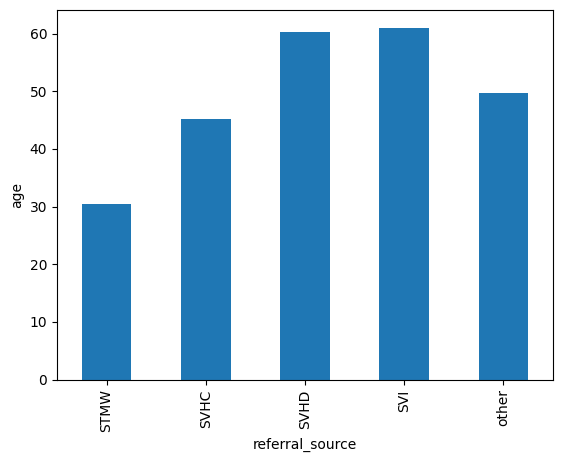

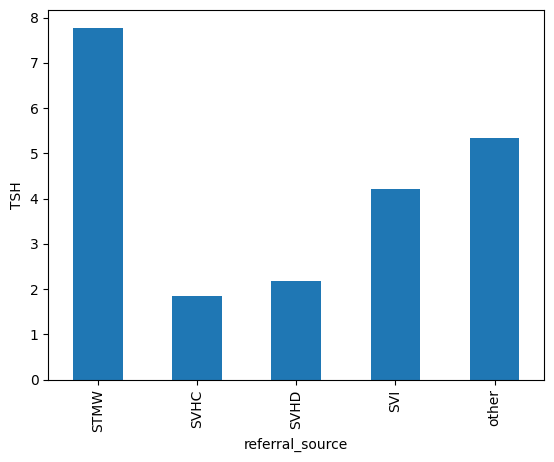

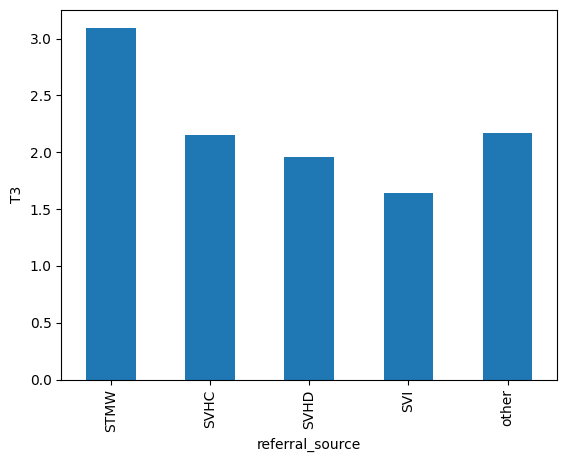

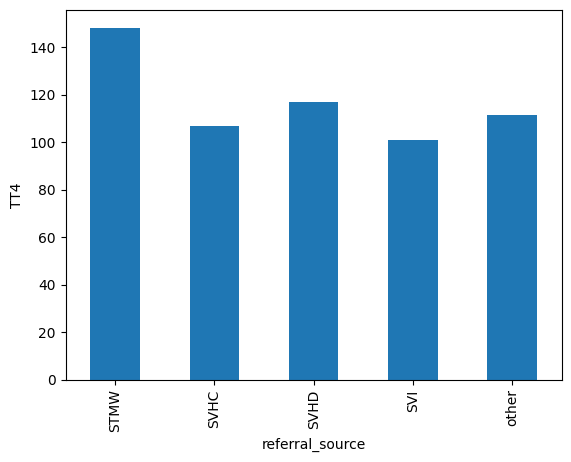

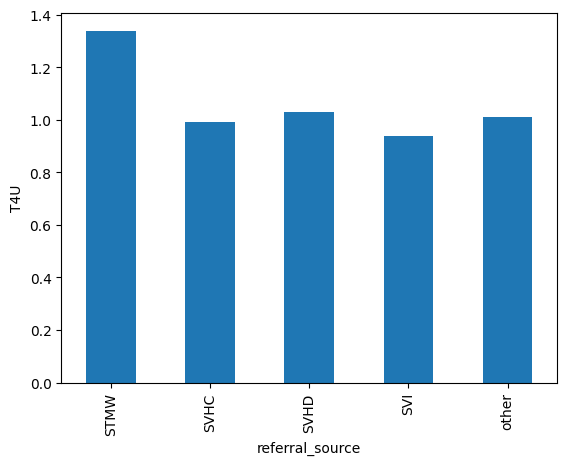

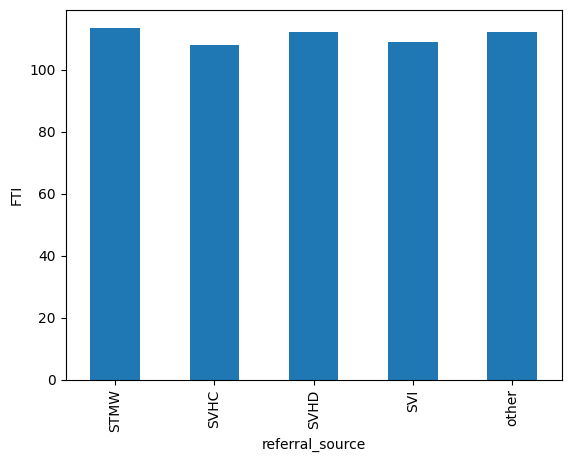

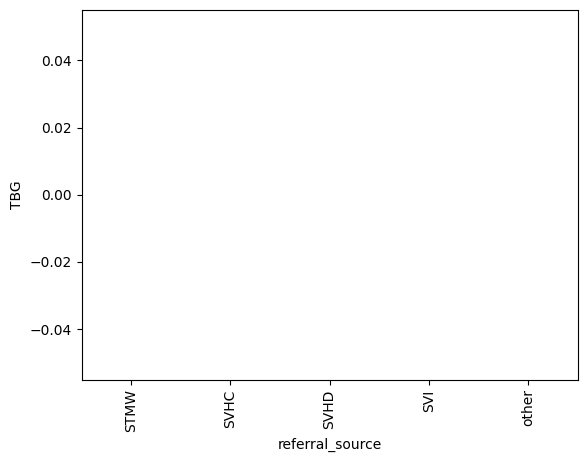

In [170]:
for features in num_features:
    temp=final_dataset.copy()
    temp.groupby('referral_source')[features].mean().plot.bar()
    plt.ylabel(features)
#     sns.barplot(x=final_dataset['referral_source'], y=final_dataset[features])
    plt.show()

### Conclusion:
- Disease features contains various classes which related to each other
- False value in ('TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured') represents missing values in ('TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG')
- Females has more occurence of disease as compared to Males

# Feature Engineering

## Dropping duplicate records

In [171]:
final_dataset.drop_duplicates(inplace=True)

In [172]:
final_dataset.shape

(3050, 30)

## 1) Imputation of Missing values

### 1.1 Imputing numerical features

- All the values missing in numerical features like 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG' are treated as report not ready which is represented by 0 value according to the database theory.
- Hence we will impute missing feature with 0, except 'age' feature

In [173]:
# for features in num_features:
#     if features!='age':
#         final_dataset[features]=final_dataset[features].fillna(0)

final_dataset.drop('TBG',axis=1,inplace=True)
num_features.remove('TBG')

#### 1.1.1 Imputing age numerical feature

- Imputing age feature using knn imputer which will calculate the mean value of k closest neighbors mean value


#### 1.1.1.1 Importing KNN imputer library

In [174]:
from sklearn.impute import KNNImputer

#### 1.1.1.2 Creating instance of KNNImputer and fit the numerical features

In [175]:
knn_imp=KNNImputer()

imp_val=knn_imp.fit_transform(final_dataset[num_features])

#### 1.1.1.3 Assigning the missing values to the age feature

In [176]:
final_dataset[num_features]=imp_val

### 1.2 Imputing categorical features

#### 1.2.1 Assigning the missing values with most frequent category

In [177]:
for features in cat_features:
    print(final_dataset[features].mode())
    final_dataset[features]=np.where(final_dataset[features].isnull(),final_dataset[features].mode(),final_dataset[features])

0    F
Name: sex, dtype: object
0    other
Name: referral_source, dtype: object
0    negative
Name: disease, dtype: object


### 1.3 Imputing boolean features

In [178]:
for features in bool_features:
    final_dataset[features]=np.where(final_dataset[features].isnull(), 0, final_dataset[features])

- Checking the null values in dataset

In [179]:
final_dataset.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
referral_source              0
disease                      0
dtype: int64

## 2) Performing encoding on boolean features

### 2.2 Performing encoding on categorical features

- Below code will be used to assign a numeric digit to each unique value in each feature of categorical feature

In [180]:
for features in cat_features:
    if features!='disease':
        cat_encode={val:idx for idx, val in enumerate(final_dataset[features].unique(),start=1)}
        print(cat_encode)
        final_dataset[features]=final_dataset[features].map(cat_encode)

{'F': 1, 'M': 2}
{'SVHC': 1, 'other': 2, 'SVI': 3, 'STMW': 4, 'SVHD': 5}


## 3) Handling Rare Classes in disease feature and also classes related to another one

### 3.1 Checking the frequency of each class in disease feature

In [181]:
final_dataset['disease'].value_counts()

disease
negative                   2753
compensated hypothyroid     154
primary hypothyroid          64
hyperthyroid                 62
T3 toxic                      8
goitre                        7
secondary hypothyroid         2
Name: count, dtype: int64

- primary hypothyroid (297) ---> primary hypothyroid concurrent non-thyroidal illness (6) = 303
- underreplaced (111) --> underreplacement (35) + underreplaced increased binding protein (2) = 148
- overreplaced (110) --> overreplacement (23) + replacement therapy (29) + consistent with replacement therapy decreased binding protein (1) = 163
- increased binding protein (470) ---> antithyroid drugs increased binding protein (1) + antithyroid drugs (14) + compensated hypothyroid increased binding protein (10)= 485
- secondary toxic (8) ---> secondary toxic  | discordant assay results (1) = 9
- discordant assay results (196) ---> secondary toxic  | discordant assay results (1) + discordant (45) = 242
- decreased binding protein (39) ---> compensated hypothyroid concurrent non-thyroidal illness decreased binding protein (1) = 40

In [182]:
final_dataset['disease'].value_counts()

disease
negative                   2753
compensated hypothyroid     154
primary hypothyroid          64
hyperthyroid                 62
T3 toxic                      8
goitre                        7
secondary hypothyroid         2
Name: count, dtype: int64

#### Combining other categories rather than negative, hyperthyroid or hypothyroid 

In [183]:
other_categories={ 'other': ['binding protein', 'replacement therapy', 'antithyroid treatment', 
                             'concurrent non-thyroidal illness', 'miscellaneous']}

In [184]:
for lists in other_categories.values():
    for values in lists:
        final_dataset['disease']=np.where(final_dataset['disease']==values,list(other_categories.keys())[list(other_categories.values()).index(lists)],final_dataset['disease'])

In [185]:
final_dataset['disease'].value_counts()

disease
negative                   2753
compensated hypothyroid     154
primary hypothyroid          64
hyperthyroid                 62
T3 toxic                      8
goitre                        7
secondary hypothyroid         2
Name: count, dtype: int64

#### Dropping unwanted categories in disease features

In [186]:
for features in ['other']:
    final_dataset['disease']=np.where(final_dataset['disease']==features, np.nan, final_dataset['disease'])

In [187]:
final_dataset.dropna(axis=0, inplace=True)

In [188]:
final_dataset['disease'].value_counts()

disease
negative                   2753
compensated hypothyroid     154
primary hypothyroid          64
hyperthyroid                 62
T3 toxic                      8
goitre                        7
secondary hypothyroid         2
Name: count, dtype: int64

In [189]:
final_dataset.shape

(3050, 29)

### 3.2 Creating dictionary to map extra classes with their relative classes

In [190]:
disease_features={'hyperthyroid':['hyperthyroid', 'T3 toxic', 'toxic goitre', 'secondary toxic', 'goitre'],
                 'hypothyroid':['hypothyroid', 'primary hypothyroid','compensated hypothyroid','secondary hypothyroid'],
                 'antithyroid treatment':['antithyroid drugs','I131 treatment','surgery'],
                  'replacement therapy': ['consistent with replacement therapy', 'underreplacement', 'overreplacement'],
                  'discordant assay results':['discordant'],
                  'binding protein': ['increased binding protein', 'decreased binding protein'],
                  'miscellaneous': ['discordant assay results'],
                  'negative': ['concurrent non-thyroidal illness']
                  
                 }

### 3.3 Mapping extra classes with their relative classes

In [191]:
for lists in disease_features.values():
    for values in lists:
        final_dataset['disease']=np.where(final_dataset['disease']==values,list(disease_features.keys())[list(disease_features.values()).index(lists)],final_dataset['disease'])

### 3.4 Checking frequency of each class after mapping

In [192]:
final_dataset['disease'].value_counts()

disease
negative        2753
hypothyroid      220
hyperthyroid      77
Name: count, dtype: int64

### Dropping Unwanted features

In [193]:
measured_bool_features=[features for features in final_dataset.columns if '_measured' in features]
measured_bool_features

['TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

In [194]:
final_dataset.drop(measured_bool_features+['referral_source'], axis=1, inplace=True)

In [195]:
# for features in num_features:
#     if features!='age':
#         print(f'===== MIN VALUES FOR "{features}" FEATURES ======')
#         for unique_val in final_dataset['disease'].unique():
#             min_val=final_dataset[(final_dataset['disease']==unique_val)].min()
#             print(f"In {unique_val} category:",min_val[features])
        
#         print('\n')
        
#         print(f'===== MAX VALUES FOR "{features}" FEATURES ======')
#         for unique_val in final_dataset['disease'].unique():
#             max_val=final_dataset[(final_dataset['disease']==unique_val)].max()
#             print(f"In {unique_val} category:",max_val[features])
        
#         print('\n')
        
#         print(f'===== AVERAGE VALUES FOR "{features}" FEATURES ======')
#         for unique_val in final_dataset['disease'].unique():
#             mean_val=final_dataset[(final_dataset['disease']==unique_val)].mean()
#             print(f"In {unique_val} category:",round(mean_val[features], 3))
#     print("\n")


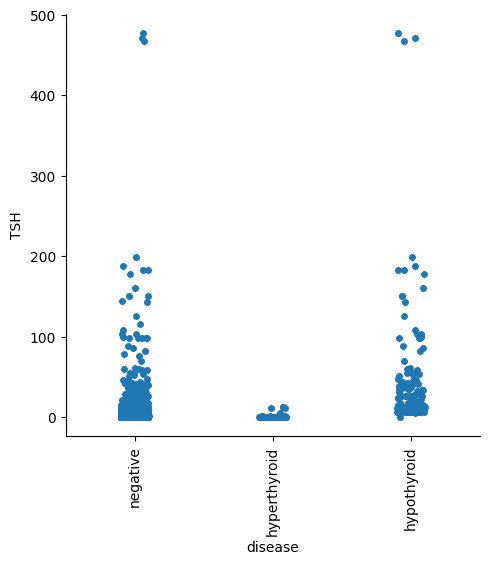

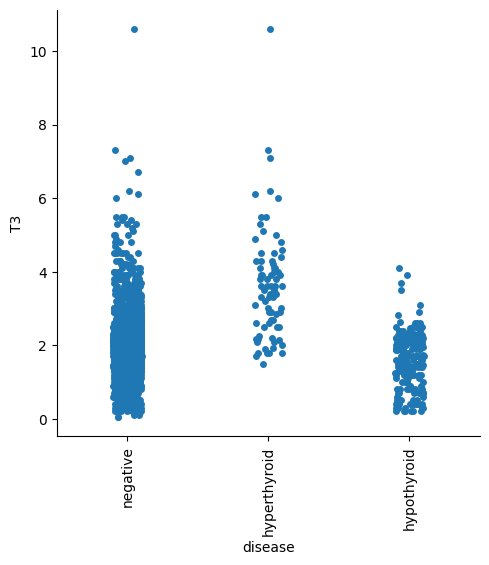

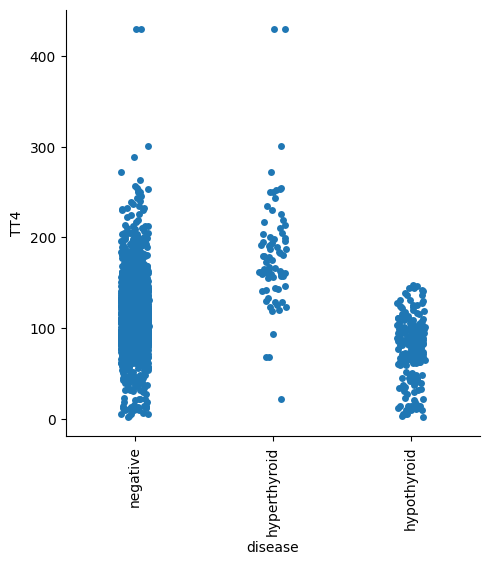

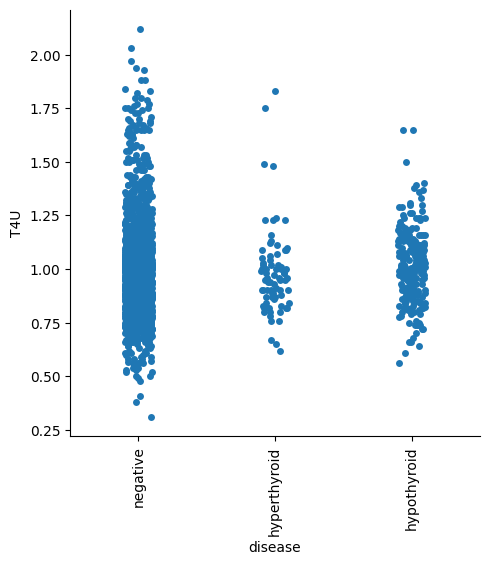

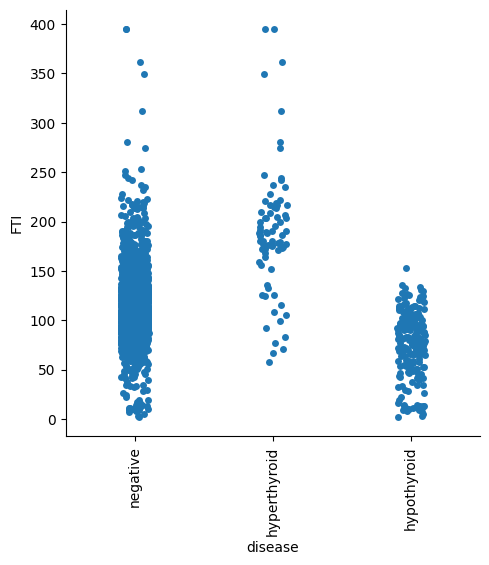

In [196]:
for features in num_features:
    temp=final_dataset.copy()
    if features != 'age':
        sns.catplot(x=temp['disease'],y=temp[features])
        plt.xticks(rotation=90)
#         temp.groupby('disease')[features].mean().plot.bar()
#         plt.xlabel('disease')
#         plt.ylabel(features)
        plt.show()

### Encoding the disease categories

In [197]:
final_dataset['disease']=np.where(final_dataset['disease']=='negative', 0,1)

### Checking the affect of outlier on disease category classes

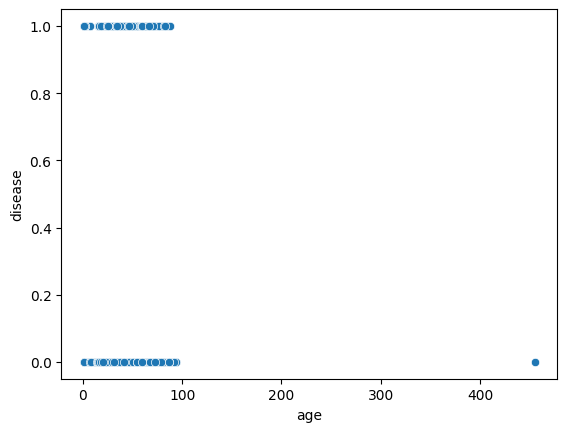

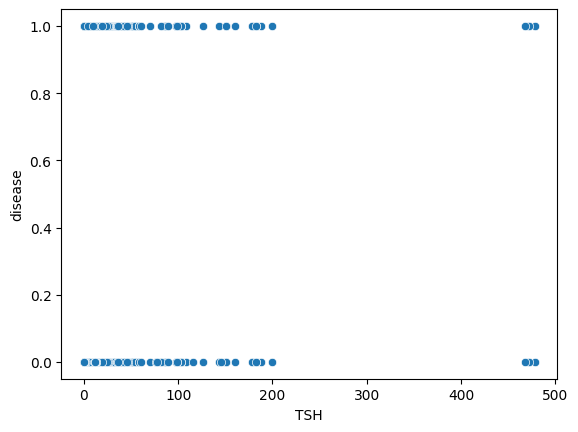

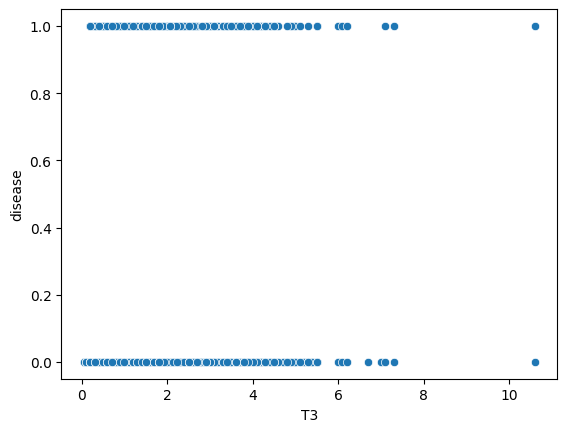

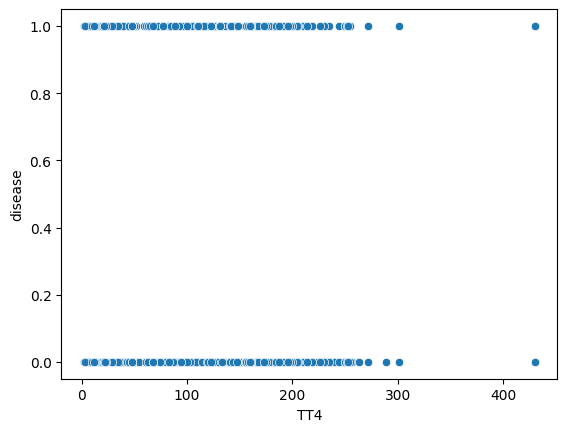

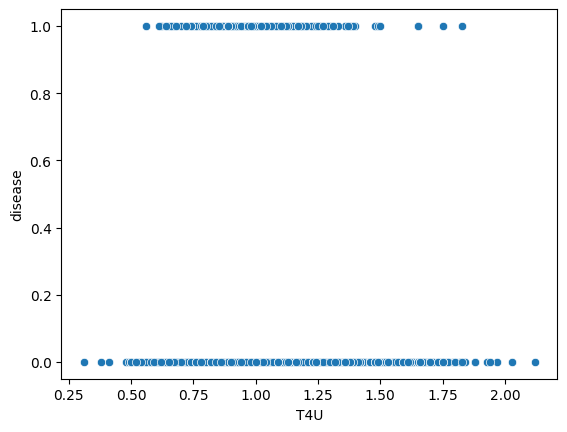

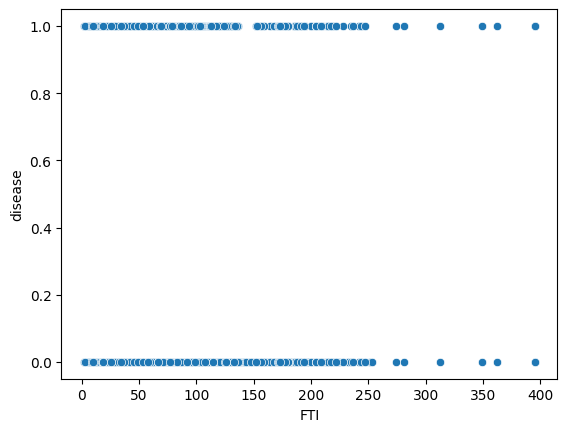

In [198]:
for features in num_features:
    sns.scatterplot(x=final_dataset[features], y=final_dataset['disease'])
    plt.show()

- All outliers may also useful in detection of disease category hence outlier removal is not necessary

In [199]:
final_dataset['disease'].value_counts()

disease
0    2753
1     297
Name: count, dtype: int64

<Axes: xlabel='disease', ylabel='count'>

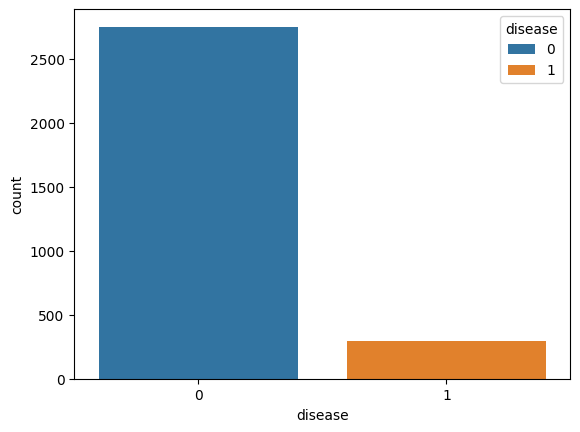

In [200]:
sns.countplot(data=final_dataset,x=final_dataset['disease'],hue='disease')

## 4) Handling imbalanced dataset

- Due to very high frequency of negative class in disease feature the data gets highly imbalanced.
- Now this highly imbalanced data may reduce the precision and recall value of all classes other than negative class.
- So, to avoid this we might have to balance the frequency of other classes also

### 4.1 Importing the library to oversample the Data
- smote library
- counter library

In [201]:
from collections import Counter
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [202]:
# class_weight={0:8316, 1:6000}

In [203]:
smote=SMOTE(sampling_strategy='not majority',k_neighbors=5)
# smote=SMOTE(sampling_strategy=class_weight,k_neighbors=3)

In [204]:
# smote=SMOTE(sampling_strategy=class_weight,k_neighbors=3)
# smote=SMOTETomek(sampling_strategy='not majority', random_state=0)
smote=SMOTETomek(sampling_strategy='not minority', random_state=0,smote=smote)
# smote=SMOTE(sampling_strategy='not majority',k_neighbors=5)

ros=RandomOverSampler(sampling_strategy='not majority')

In [205]:
print('Original dataset shape %s' % Counter(final_dataset['disease']))
# x,y=smote.fit_resample(final_dataset.iloc[:,:-1],final_dataset['disease'])

x,y=smote.fit_resample(final_dataset.iloc[:,:-1],final_dataset['disease'])

# x,y=us.fit_resample(final_dataset.iloc[:,:-1],final_dataset['disease'])
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 2753, 1: 297})
Resampled dataset shape Counter({0: 2737, 1: 2737})


In [206]:
X=pd.DataFrame(x)
Y=pd.DataFrame(y)
# X=final_dataset.iloc[:,:-1]
# Y=final_dataset['disease']

In [207]:
balanced_dataset=pd.concat([X,Y],axis=1)
final_dataset=balanced_dataset

In [208]:
X.shape

(5474, 21)

# 5) Feature Selection

In [209]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [225]:
best_feature=SelectKBest(mutual_info_classif,k=7)

In [226]:
best_feature.fit(final_dataset.iloc[:,:-1],balanced_dataset['disease'])

SelectKBest(k=7,
            score_func=<function mutual_info_classif at 0x000001A78C23E980>)

In [227]:
best_feature.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True])

In [228]:
feature_names=final_dataset.iloc[:,:-1].columns[best_feature.get_support()]

In [229]:
X=final_dataset[feature_names]

In [230]:
Y=final_dataset['disease']

In [231]:
X.head()

age  sex   TSH    T3    TT4    T4U    FTI
0  41.0    1  1.30  2.50  125.0  1.140  109.0
1  23.0    1  4.10  2.00  102.0  1.078   96.0
2  46.0    2  0.98  1.56  109.0  0.910  120.0
3  70.0    1  0.16  1.90  175.0  0.960  169.2
4  70.0    1  0.72  1.20   61.0  0.870   70.0

## 6) Data Transformation 

In [232]:
from sklearn.preprocessing import StandardScaler

In [233]:
scale=StandardScaler()

In [234]:
trans_x=pd.DataFrame(scale.fit_transform(X), columns=X.columns)

In [235]:
trans_x.to_csv('Processed_training_data2.csv',index=False)

In [236]:
Y.to_csv('output_training_data2.csv',index=False)

In [237]:
trans_x.head()

age       sex       TSH        T3       TT4       T4U       FTI
0 -0.559041 -0.483155 -0.335006  0.414732  0.373330  0.790740  0.012055
1 -1.492746 -0.483155 -0.261923 -0.069202 -0.092967  0.436466 -0.245856
2 -0.299678  2.069730 -0.343358 -0.495063  0.048950 -0.523500  0.230287
3  0.945262 -0.483155 -0.364761 -0.165988  1.387020 -0.237796  1.206380
4  0.945262 -0.483155 -0.350145 -0.843495 -0.924192 -0.752063 -0.761678

In [238]:
trans_x.columns

Index(['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

In [239]:
trans_x.shape

(5474, 7)